# Hypothesis 4: Humidity is correlated with both high temperature and high precipitation

To test the hypothesis, we import the dataset with 30 years of daily temperature in Corpus Christi from the year January 1994 - December 2023.
<hr>
Dataset is a csv file containing the following fields:
Year, Month, Day, min_temp(Farenheit), max_temp(Farenheit), Precipitation(inches), Specific Humidity (kg/kg)

In [49]:
# Import Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
from scipy.stats import probplot
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Import dataset into a dataframe
weather_data = pd.read_csv("humidity_temp_precipitation.csv", names=['year','month','day','tmin','tmax','pr','sph'])
# Convert year, month, and day columns to a datetime object
weather_data['date'] = pd.to_datetime(weather_data[['year', 'month', 'day']])
weather_data

,year,month,day,tmin,tmax,pr,sph,date
0,1994,1,1,31.01,37.85,0.72,0.00423,1994-01-01
1,1994,1,2,30.11,39.83,0.16,0.00417,1994-01-02
2,1994,1,3,34.25,43.79,0.29,0.00492,1994-01-03
3,1994,1,4,36.41,44.51,0.14,0.00521,1994-01-04
4,1994,1,5,32.81,42.53,0.06,0.00395,1994-01-05
...,...,...,...,...,...,...,...,...
10952,2023,12,27,32.27,40.19,0.00,0.00357,2023-12-27
10953,2023,12,28,36.05,45.95,0.00,0.00386,2023-12-28
10954,2023,12,29,38.39,51.71,0.00,0.00393,2023-12-29
10955,2023,12,30,30.47,45.59,0.06,0.00411,2023-12-30


In [51]:
# Create a new DataFrame to store the monthly statistics
monthly_stats = pd.DataFrame()
monthly_stats['monthly_temp'] = weather_data.groupby(['year', 'month'])[['tmin', 'tmax']].mean().mean(axis=1)
# Compute monthly range
monthly_stats['monthly_pr'] = weather_data.groupby(['year', 'month'])['pr'].mean()
# Compute monthly interquartile range
monthly_stats['monthly_sph'] = weather_data.groupby(['year', 'month'])['sph'].mean()

monthly_stats.reset_index(inplace=True)
monthly_stats

,year,month,monthly_temp,monthly_pr,monthly_sph
0,1994,1,37.231613,0.074194,0.003949
1,1994,2,31.781429,0.050000,0.002906
2,1994,3,42.939355,0.036774,0.003535
3,1994,4,49.694000,0.080667,0.004929
4,1994,5,55.757097,0.071290,0.006300
...,...,...,...,...,...
355,2023,8,67.715484,0.031935,0.007365
356,2023,9,58.862000,0.037000,0.006343
357,2023,10,49.465806,0.050000,0.005474
358,2023,11,37.763000,0.086000,0.003975


# We need to normalize the data to squash them in between two values (0,1) to make them comparable
MinMaxScaler is used for transforming values

In [52]:
# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the selected columns
monthly_stats[['monthly_temp','monthly_pr','monthly_sph']] = scaler.fit_transform(monthly_stats[['monthly_temp','monthly_pr','monthly_sph']])

monthly_stats

,year,month,monthly_temp,monthly_pr,monthly_sph
0,1994,1,0.321516,0.340859,0.207342
1,1994,2,0.212586,0.229709,0.067444
2,1994,3,0.435592,0.168947,0.151777
3,1994,4,0.570593,0.370597,0.338707
4,1994,5,0.691772,0.327521,0.522486
...,...,...,...,...,...
355,2023,8,0.930776,0.146717,0.665269
356,2023,9,0.753828,0.169985,0.528251
357,2023,10,0.566032,0.229709,0.411744
358,2023,11,0.332136,0.395100,0.210825


## Plot the humidity against temperature and precipiation to understand their trends and seasonalities.

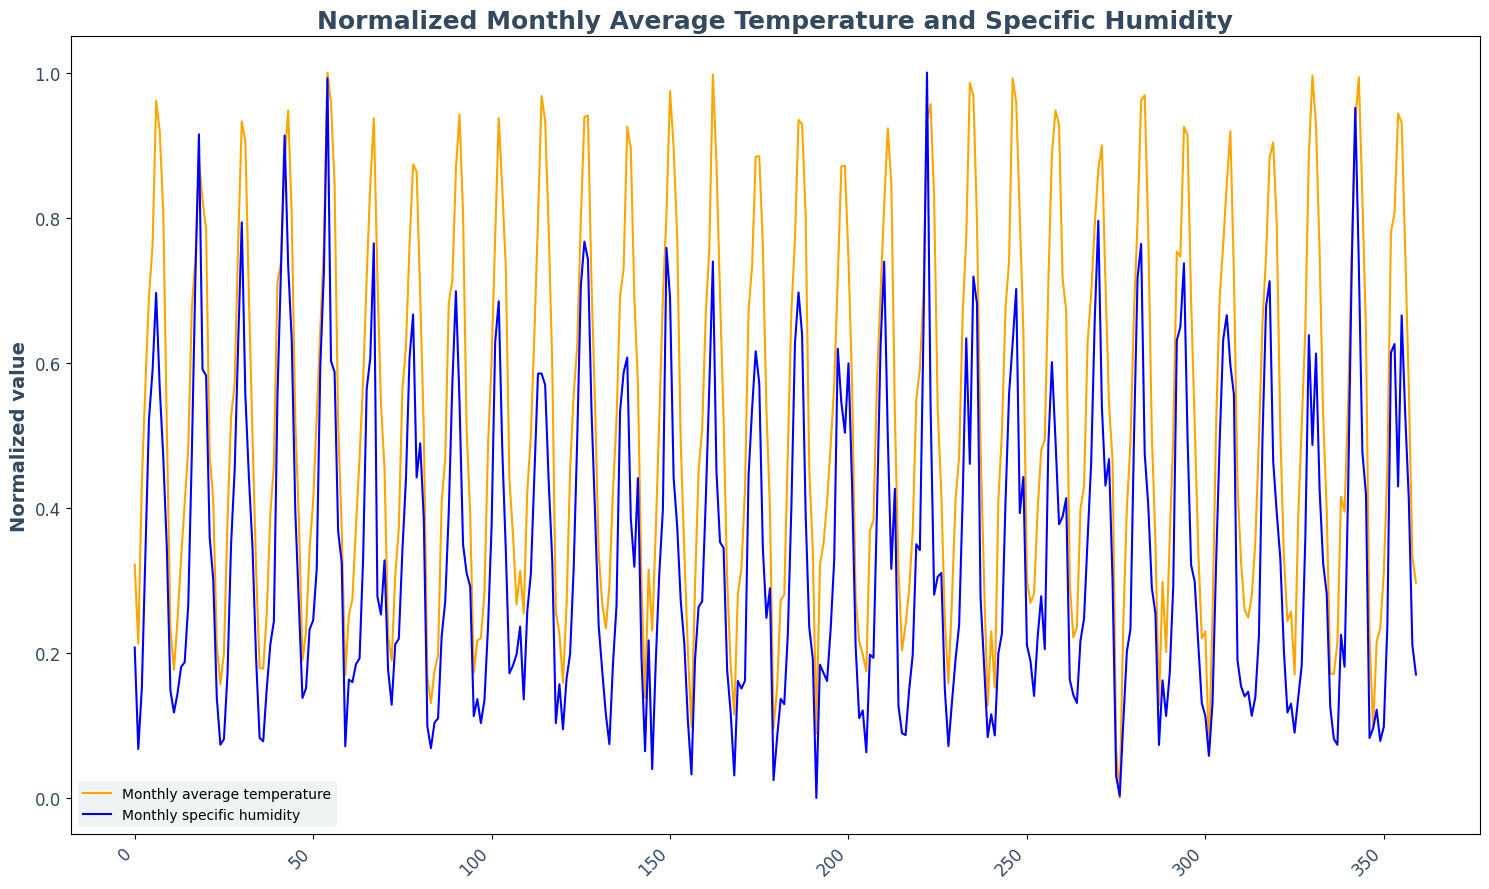

In [53]:
plt.figure(figsize=(15, 9))
plt.plot([i for i in range(len(monthly_stats))], monthly_stats['monthly_temp'], label="Monthly average temperature", color="orange")
plt.plot([i for i in range(len(monthly_stats))], monthly_stats['monthly_sph'], label="Monthly specific humidity", color="blue")

plt.title('Normalized Monthly Average Temperature and Specific Humidity', fontsize=18, fontweight='bold', color='#34495e')
#plt.xlabel('Month', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Normalized value', fontsize=14, fontweight='bold', color='#34495e')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.gca().set_axisbelow(True)
plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

legend = plt.legend()
legend.get_frame().set_facecolor('#ecf0f1')
legend.get_frame().set_linewidth(0)

plt.tight_layout()
plt.show()

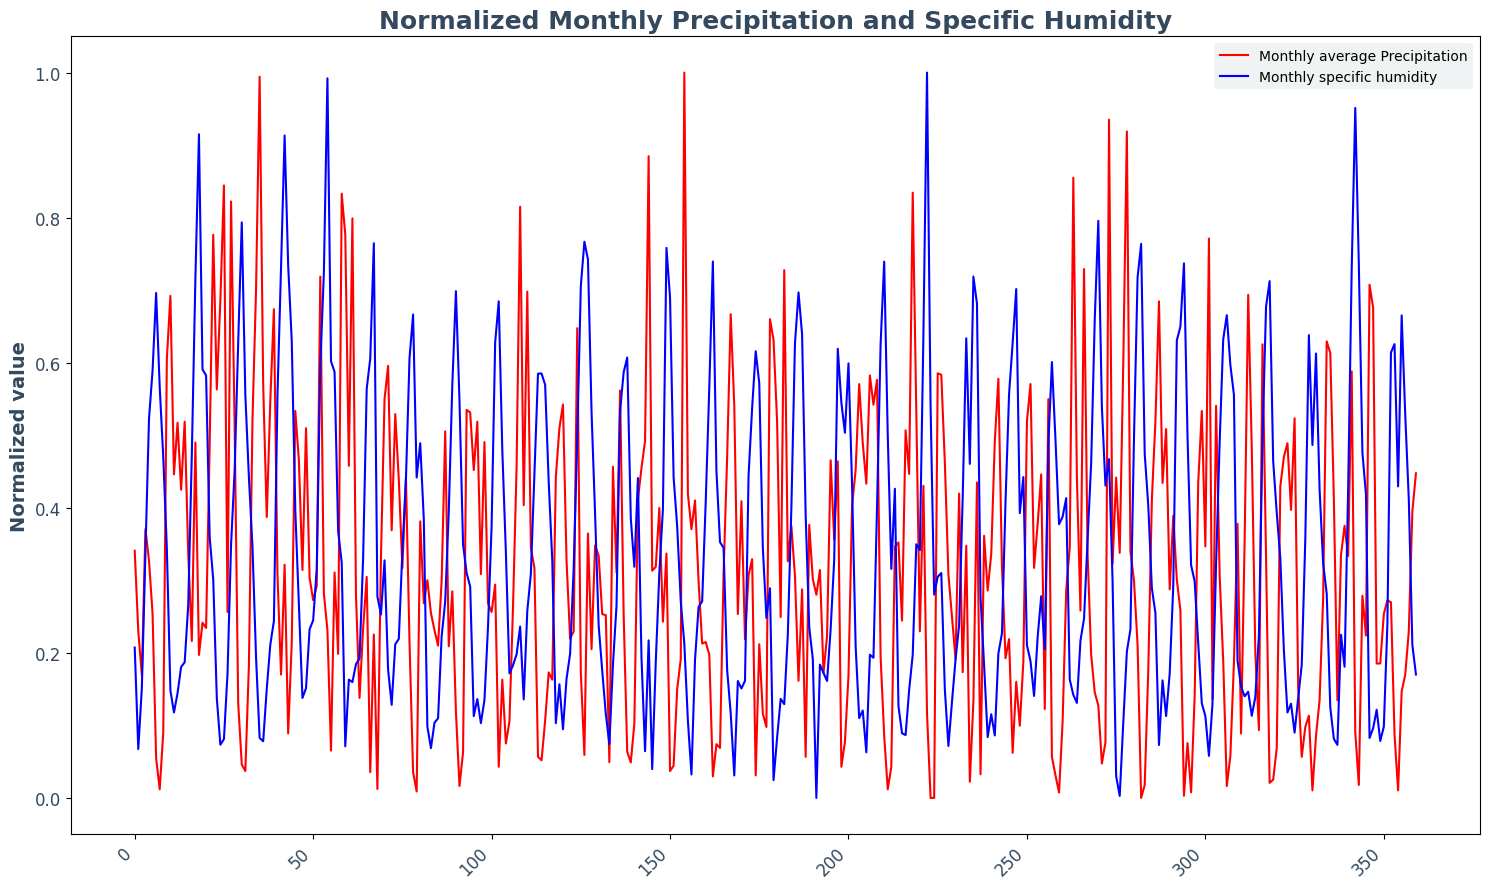

In [54]:
plt.figure(figsize=(15, 9))
plt.plot([i for i in range(len(monthly_stats))], monthly_stats['monthly_pr'], label="Monthly average Precipitation", color="red")
plt.plot([i for i in range(len(monthly_stats))], monthly_stats['monthly_sph'], label="Monthly specific humidity", color="blue")

plt.title('Normalized Monthly Precipitation and Specific Humidity', fontsize=18, fontweight='bold', color='#34495e')
#plt.xlabel('Month', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Normalized value', fontsize=14, fontweight='bold', color='#34495e')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.gca().set_axisbelow(True)
plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

legend = plt.legend()
legend.get_frame().set_facecolor('#ecf0f1')
legend.get_frame().set_linewidth(0)

plt.tight_layout()
plt.show()

Now we compute Pearson's correlation coefficients for specific humidity with temperature and precipitation

In [55]:
pearsons_corr_coefficient_with_range = monthly_stats['monthly_sph'].corr(monthly_stats['monthly_pr'])
print(pearsons_corr_coefficient_with_range)

-0.4608254140700917


In [56]:
pearsons_corr_coefficient_with_range = monthly_stats['monthly_sph'].corr(monthly_stats['monthly_temp'])
print(pearsons_corr_coefficient_with_range)

0.9092697368799633


Plot monthly humidity with precipitation and temperature

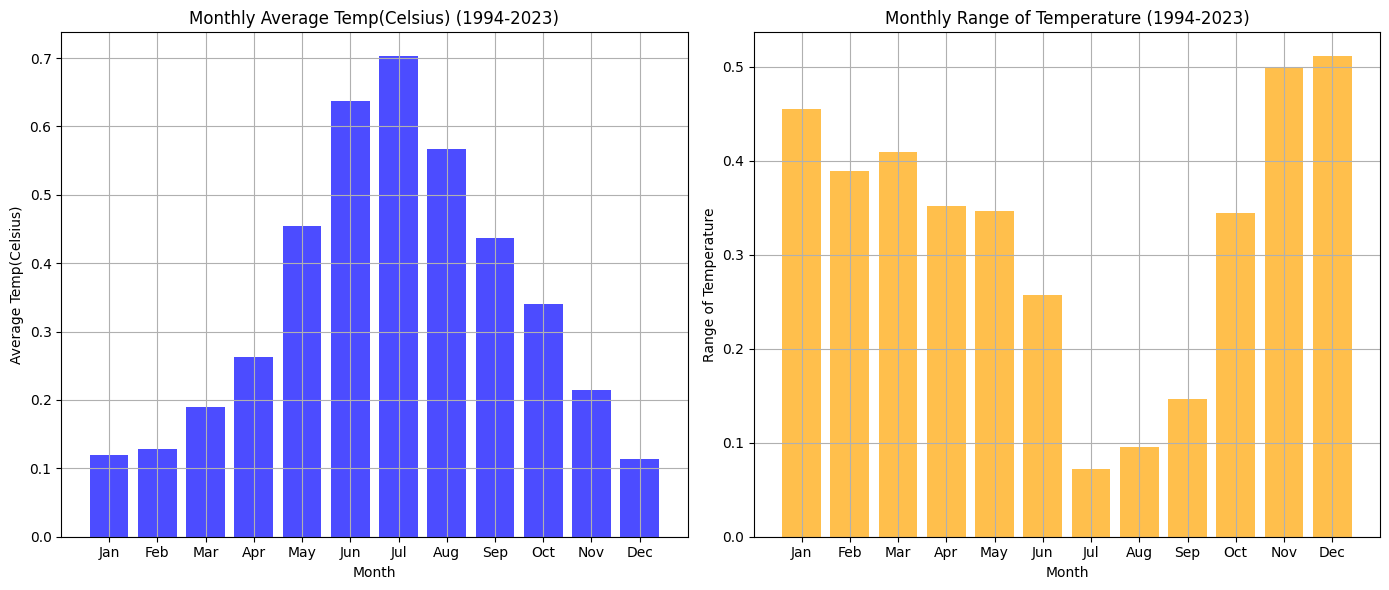

In [58]:
monthly_sph = monthly_stats.groupby('month')['monthly_sph'].mean()
monthly_pr = monthly_stats.groupby('month')['monthly_pr'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(monthly_sph.index, monthly_sph, color='blue', alpha=0.7)
plt.title('Monthly Average Temp(Celsius) (1994-2023)')
plt.xlabel('Month')
plt.ylabel('Average Temp(Celsius)')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(monthly_pr.index, monthly_pr, color='orange', alpha=0.7)
plt.title('Monthly Range of Temperature (1994-2023)')
plt.xlabel('Month')
plt.ylabel('Range of Temperature')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.tight_layout()
plt.show()


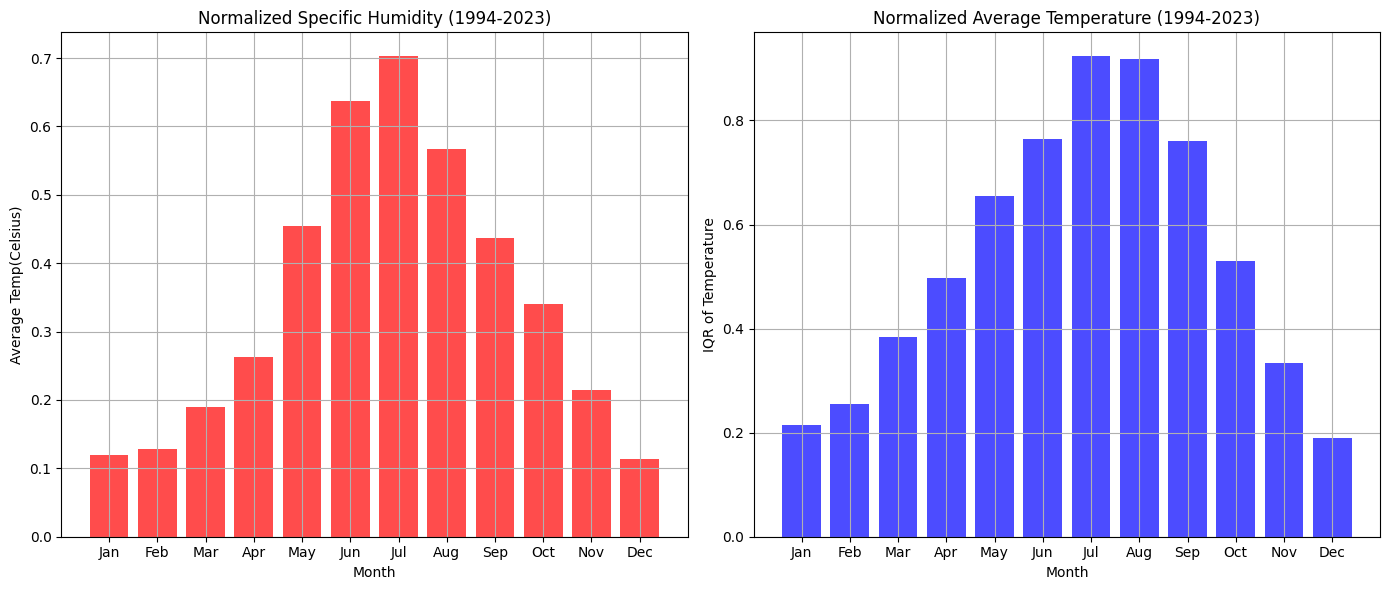

In [59]:
# Calculate monthly means for tmmn and tmmx
monthly_sph = monthly_stats.groupby('month')['monthly_sph'].mean()
monthly_temp = monthly_stats.groupby('month')['monthly_temp'].mean()

# Plot histograms for tmmn and tmmx
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(monthly_sph.index, monthly_sph, color='red', alpha=0.7)
plt.title('Normalized Specific Humidity (1994-2023)')
plt.xlabel('Month')
plt.ylabel('Average Temp(Celsius)')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(monthly_temp.index, monthly_temp, color='blue', alpha=0.7)
plt.title('Normalized Average Temperature (1994-2023)')
plt.xlabel('Month')
plt.ylabel('IQR of Temperature')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names on x-axis
plt.grid(True)

plt.tight_layout()
plt.show()


# We perform the Paired t-test for humidity with temperature and precipitation respectively

In [60]:
# Perform paired t-test
t_statistic, p_value = ttest_rel(monthly_sph, monthly_temp)

# Print the results
print(f'Paired t-test Results:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Specific Humidity and Temperature.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Specific Humidity and Temperature.")


Paired t-test Results:
T-statistic: -7.537761430655235
P-value: 1.1450080248195662e-05
Reject the null hypothesis: There is a significant difference between Specific Humidity and Temperature.


In [61]:
# Perform paired t-test
t_statistic, p_value = ttest_rel(monthly_sph, monthly_pr)

# Print the results
print(f'Paired t-test Results:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Specific Humidity and Precipitation.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Specific Humidity and Precipitation.")


Paired t-test Results:
T-statistic: 0.24079021301853834
P-value: 0.8141467411464898
Fail to reject the null hypothesis: There is no significant difference between Specific Humidity and Precipitation.


Paired t-test Result: The paired t-test results indicate a significant difference between 'humidity' and 'temperature', but no significant difference between 'humidity' and 'precipiation'.

T-statistic: The t-statistic is a measure of how many standard deviations the means of two groups are apart.
In case of 'humidity' and 'temperature', the t-statistic is approximately -7.54.
Likewise, for 'humidity' and 'precipiation', it is approximately 0.24.

P-value: The p-value is the probability of observing a t-statistic as extreme as the one calculated, assuming that the null hypothesis (no difference between 'humidity' and 'temperature') is true. The extremely low p-value (close to zero and in scientific notation, indicates strong evidence against the null hypothesis.

p-value for (humitidy, temperature) pair is very low. But for (humidity, precipitation), it is high.

Thus, Humidity is correlation with high temperature but not with high precipitation.